In [2]:
import pandas as pd

# Q1
# a) Read the csv file (Bank.csv in Canvas) as Pandas DataFrame

url = 'https://github.com/lc0312/COSC502/blob/main/Bank.csv?raw=true'
bank_df = pd.read_csv(url)

In [3]:
# b) Consider the ‘Personal Loan’ as class (Y) variable and all other columns (Ignore the ID and Zipcode columns) as X variable.

Y_data = bank_df['Personal Loan']
X_data = bank_df.drop(['ID','ZIP Code','Personal Loan'], axis=1)

In [4]:
# c) Create a training (70%) and test set (30%) from the dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X_data.values, Y_data.values, test_size=0.3)

In [5]:
# d) Classify the above dataset by using the K-NN algorithms and compare the performances (using both the Euclidean and Manhattan distance measures).
from sklearn.neighbors import KNeighborsClassifier

knn_M = KNeighborsClassifier(p=1)
knn_M.fit (X_train, Y_train)

print ('Manhattan:', knn_M.score (X_test, Y_test))

knn_E = KNeighborsClassifier(p=2)
knn_E.fit (X_train, Y_train)

print ('Euclidean:', knn_E.score (X_test, Y_test))

Manhattan: 0.9326666666666666
Euclidean: 0.916


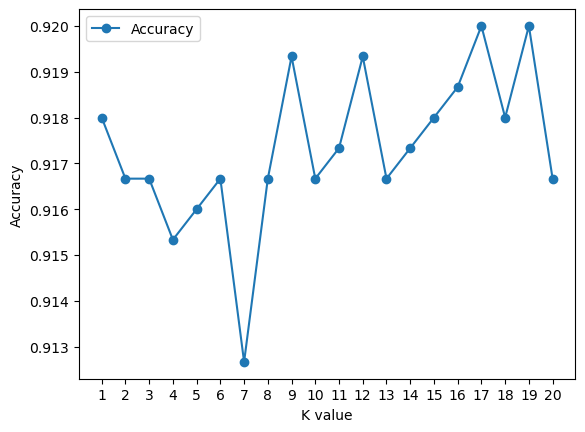

In [6]:
# e) For K-NN classification, fit and test the model for different values for K (from 1 to 20) using a for loop and record and plot the KNN’s testing accuracy in a variable (scores).
import matplotlib.pyplot as plt
import numpy as np


scores_knn = []
x_number = np.arange (1,21,1)

for n_number in range (20):
    knn = KNeighborsClassifier(n_neighbors=n_number+1)
    knn.fit (X_train, Y_train)
    scores_knn.append (knn.score(X_test, Y_test))

y_number = np.array (scores_knn)

plt.plot (x_number, y_number,marker='o', label='Accuracy')
plt.xlabel ('K value')
plt.ylabel ('Accuracy')
plt.xticks(x_number, x_number)
plt.legend ()
plt.show ()

Accuracy and F1 score: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1411
           1       0.36      0.52      0.42        89

    accuracy                           0.92      1500
   macro avg       0.66      0.73      0.69      1500
weighted avg       0.93      0.92      0.92      1500

Confuison matrix: 
 [[1328   83]
 [  43   46]] 

Compare with hw4:


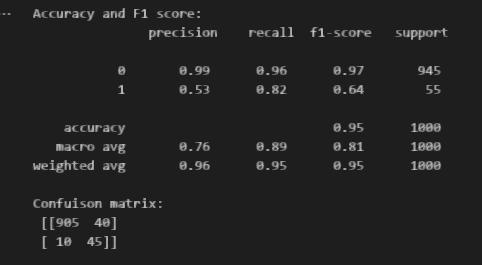

In [7]:
# f) Compare the performances (test accuracies and confusion matrices) of Logistic Regression (in HW4) and KNN classifiers and show the result.

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print ('Accuracy and F1 score: \n', classification_report (knn_E.predict(X_test), Y_test))

print ('Confuison matrix: \n', confusion_matrix (knn_E.predict(X_test), Y_test),'\n')


print ('Compare with hw4:')
from IPython import display
display.Image('D:\hw4_score.png')

In [8]:
#Q2
# a) Read the data set as Pandas Dataframe object and consider the columns: Gender, Married, Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area as feature input (X) and Loan_Status as Label output (Y)
url = 'https://github.com/lc0312/COSC502/blob/main/Customer.csv?raw=true'
Customer_df = pd.read_csv(url)

output_data = Customer_df['Loan_Status']
input_data = Customer_df[['Gender', 'Married','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

In [20]:
# b) Perform the necessary conversion (Label encoding and may be feature scaling) of appropriate features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#input_data = pd.get_dummies(data=input_data, columns=['Gender', 'Married', 'Education', 'Property_Area'])

for col in ('Gender', 'Married', 'Education', 'Property_Area'):
    input_data[col] = le.fit_transform(input_data[col])

print ('For this imple question due to the low load of work, I do not use feature scaling, becasue numbers are not complex yet') 

input_data = input_data.fillna(method="ffill")

For this imple question due to the low load of work, I do not use feature scaling, becasue numbers are not complex yet


In [23]:
# c) Classify the data set (20% test, 80% training) using Decision Tree and Random Forest classifier

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split (input_data, output_data, test_size=0.2)

dt = tree.DecisionTreeClassifier()
dt.fit (X_train, Y_train)


rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(input_data, output_data)


RandomForestClassifier(max_depth=2, random_state=0)

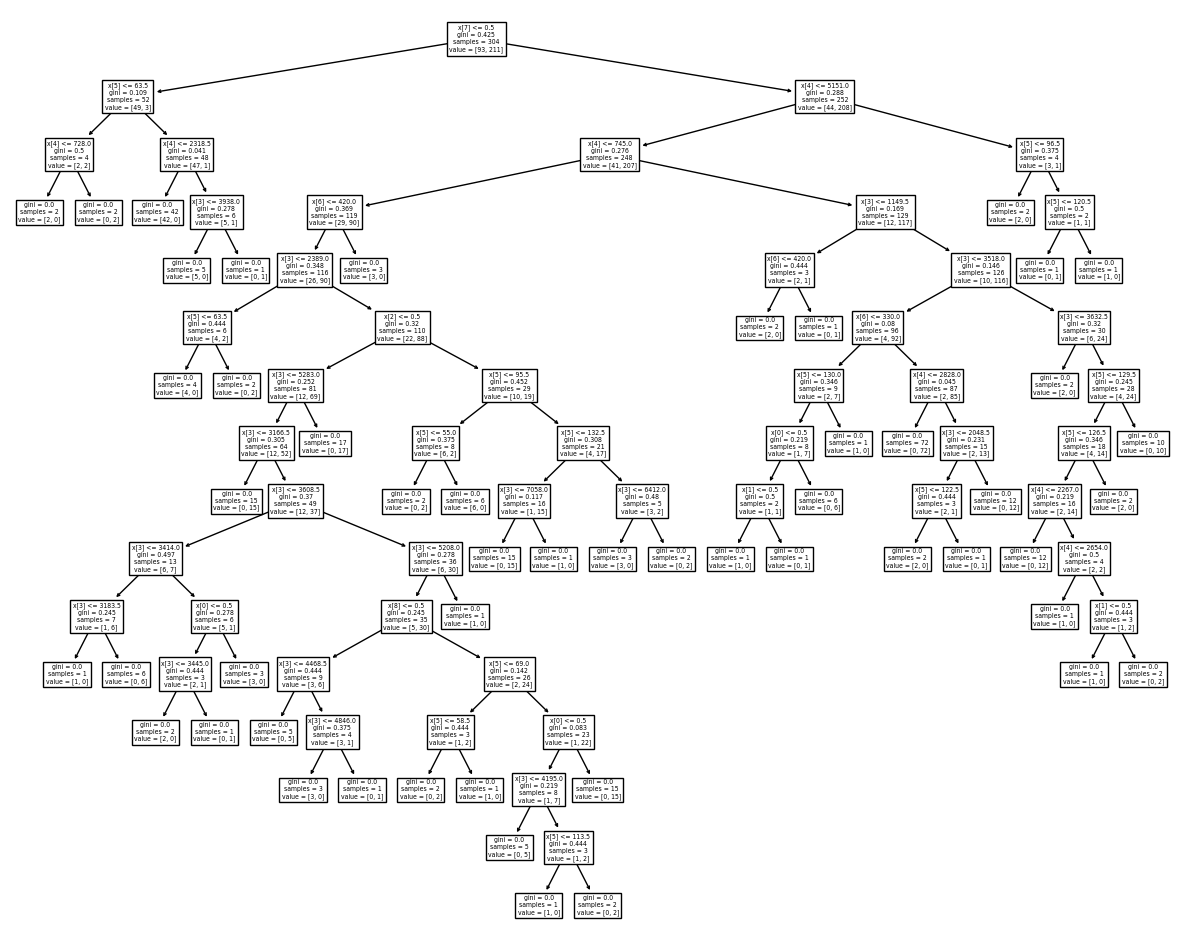

In [29]:
# d) For the Decision Tree algorithm generate the tree and show/save it as an image file. Show the first and last two decision trees generated by your Random Forest classifier.
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt)
fig.savefig('tree.png',format='png')